In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score)
warnings.filterwarnings("ignore")

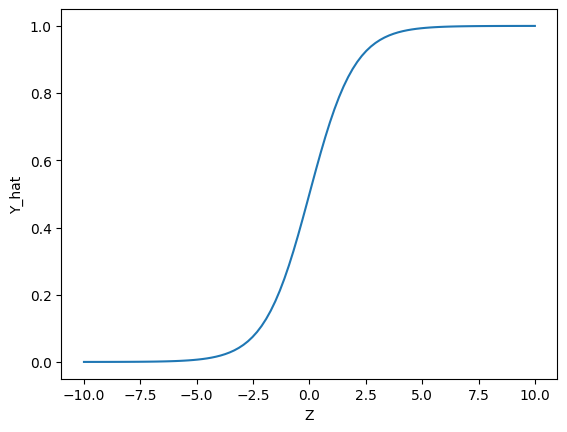

In [2]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')

plt.show()


### Loading the dataset

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
y_test = np.load('artifacts/y_test.npz')['arr_0']


In [4]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000,
)

model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [6]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12668,))

In [7]:
Y_proba_train

array([[0.83201964, 0.16798036],
       [0.91486415, 0.08513585],
       [0.74766146, 0.25233854],
       ...,
       [0.46479775, 0.53520225],
       [0.36867483, 0.63132517],
       [0.7050599 , 0.2949401 ]], shape=(12668, 2))

In [8]:
accuracy = accuracy_score(y_test, Y_hat_test)
precision = precision_score(y_test, Y_hat_test)
recall = recall_score(y_test, Y_hat_test)
f1_score = f1_score(y_test, Y_hat_test)

In [9]:
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

accuracy: 0.6948474237118559
precision: 0.33884297520661155
recall: 0.6542553191489362
f1_score: 0.44646098003629764


<Axes: >

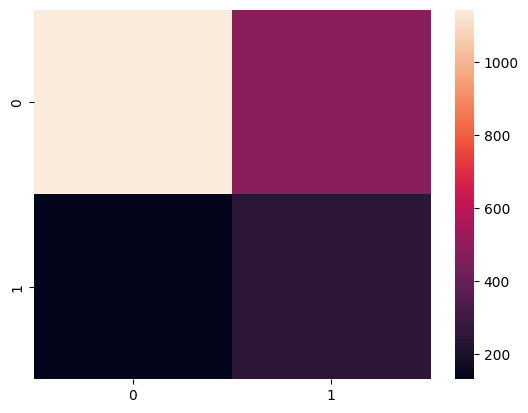

In [10]:
cm = confusion_matrix(y_test, Y_hat_test)
sns.heatmap(cm)